This notebook is a demonstration of how SAM-family models can be used to segment tongue from background.

In [1]:
# uncomment and run this in colab to install required packages
# !pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from ultralytics import SAM
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Please check the documentation at https://docs.ultralytics.com/models/sam-2
# to get the latest models
model = SAM("sam2.1_l.pt")
model.info()

100%|██████████| 428M/428M [00:06<00:00, 74.4MB/s]


Model summary: 854 layers, 224,446,642 parameters, 224,446,642 gradients


(854, 224446642, 224446642, 0.0)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

device

'cuda'

# Image Definition

In [5]:
IMAGE = "Samples/sample_9.jpg"

In [6]:
# skimage_loaded_image = io.imread(IMAGE)
pil_loaded_image = Image.open(IMAGE)
numpy_image = np.array(Image.open(IMAGE))
numpy_image = numpy_image.astype('uint8')

In [7]:
numpy_image.shape

(640, 640, 3)

In [8]:
# The model can take in an image path or a PIL image object
# results_path = model(IMAGE, points=[320, 320], labels=[1])
# results_pil = model(pil_loaded_image, points=[320, 320], labels=[1])
results_pil = model(pil_loaded_image)


0: 1024x1024 1 0, 1 1, 17530.6ms
Speed: 175.1ms preprocess, 17530.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [9]:
len(results_pil)

1

# Segmentation from PIL Object

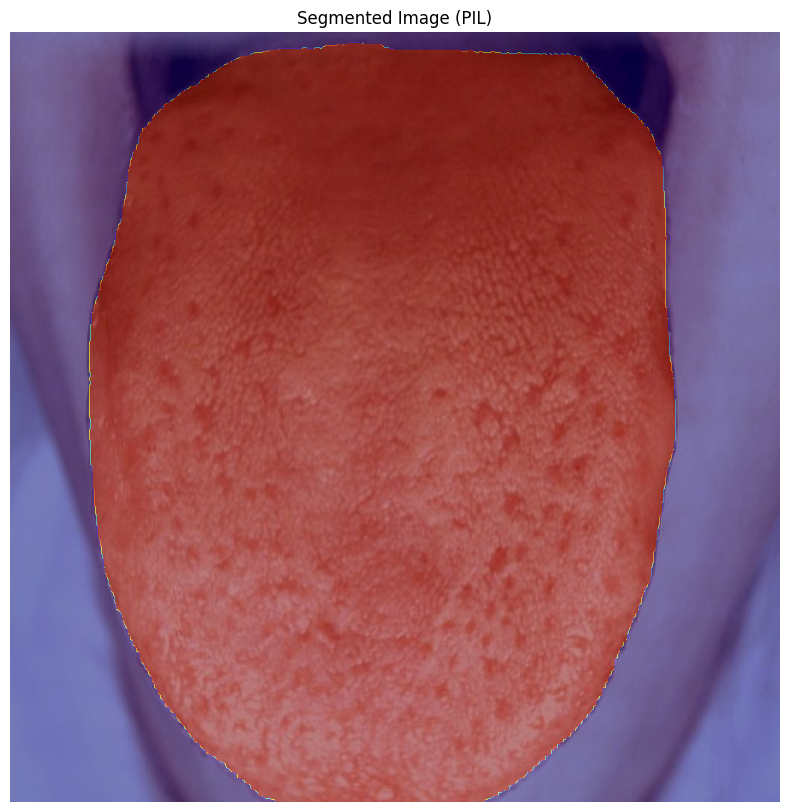

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(pil_loaded_image)

# Get the mask from the results
mask_pil = results_pil[0].masks.data[0].cpu().numpy()

# Overlay the mask on the image
plt.imshow(mask_pil, alpha=0.5, cmap='jet')
plt.axis('off')
plt.title('Segmented Image (PIL)')
plt.show()

# Masking

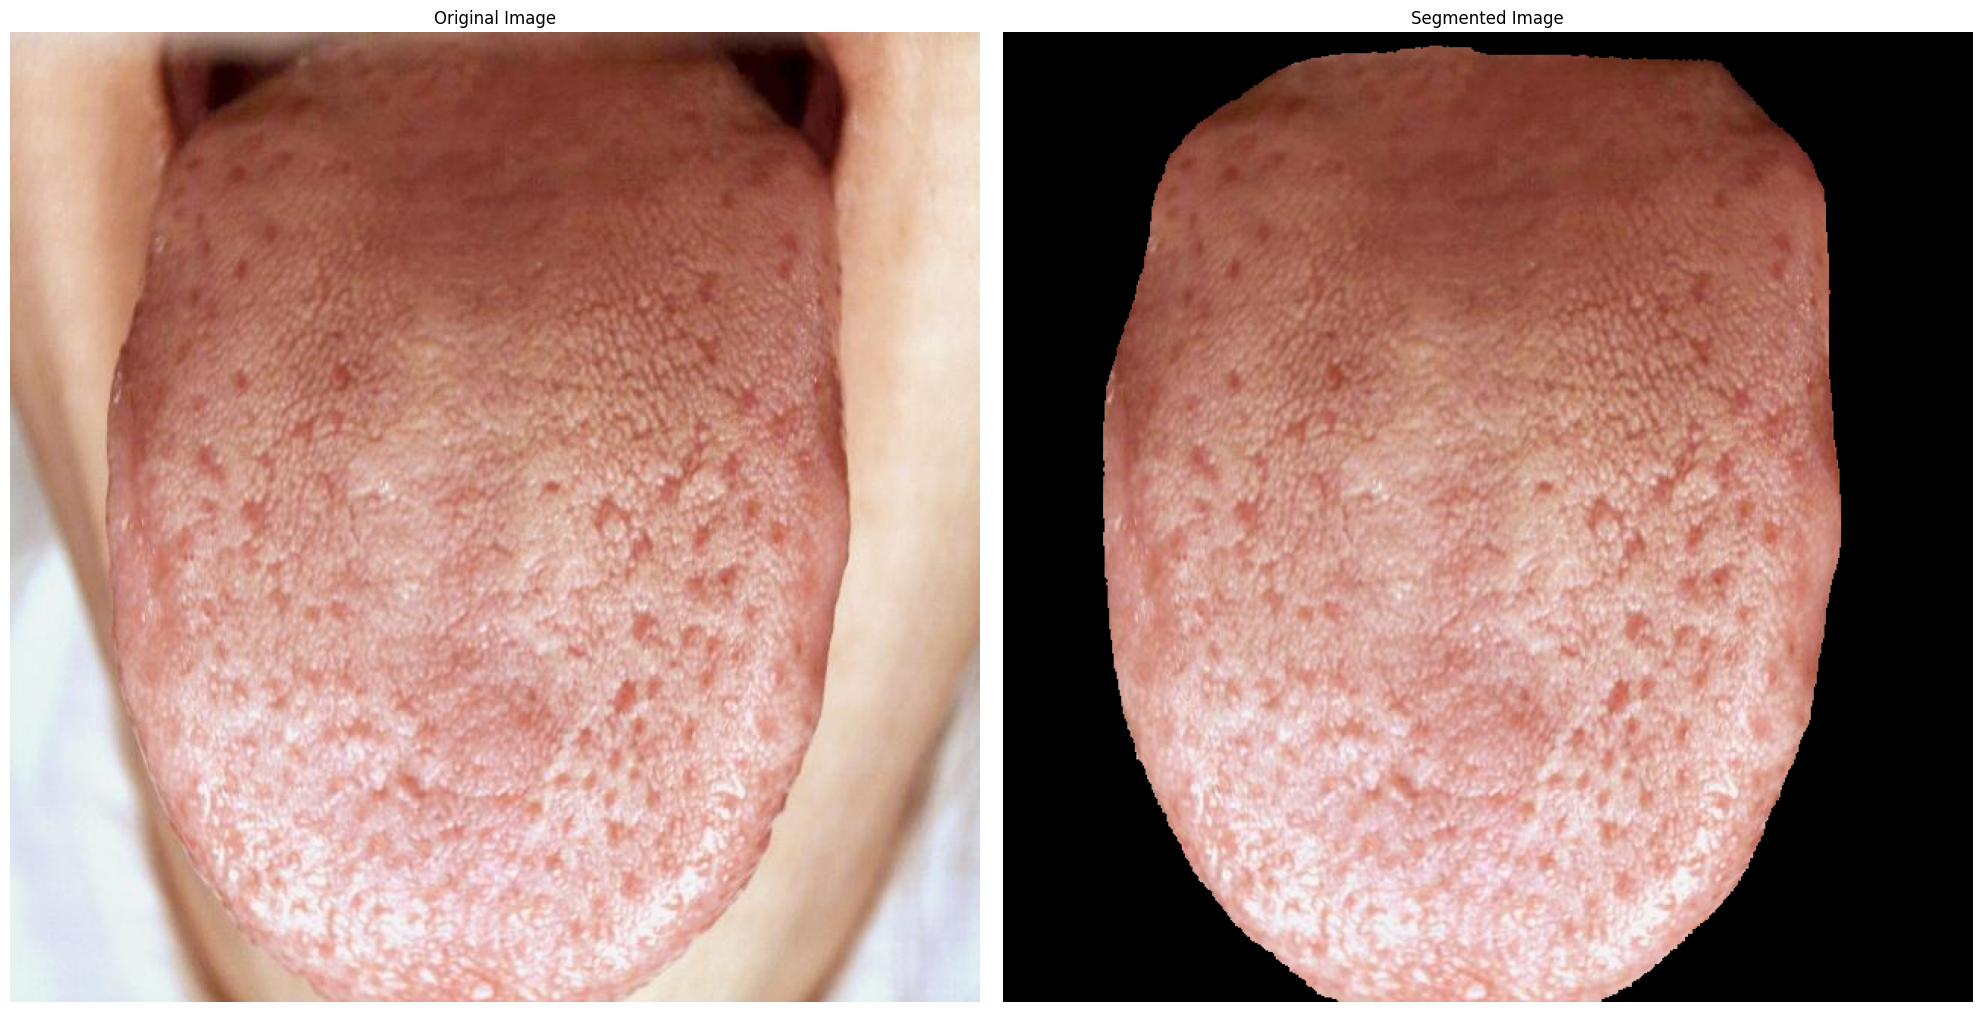

In [14]:
binary_mask = mask_pil > 0.5

rgb_mask = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)
segmented_image = numpy_image * rgb_mask

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(numpy_image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(segmented_image)
ax2.set_title('Segmented Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Optional: image saving
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

segmented_image_output = Image.fromarray(segmented_image, mode='RGB')
output_path = os.path.join(output_dir, "segmented_" + IMAGE.split("/")[-1])
segmented_image_output.save(output_path)

print(f"Segmented image saved to: {output_path}")

Segmented image saved to: output/segmented_sample_9.jpg
